In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
%matplotlib inline

Using equation from this pset: http://www.physics.usyd.edu.au/~helenj/SeniorAstro/lab4.pdf

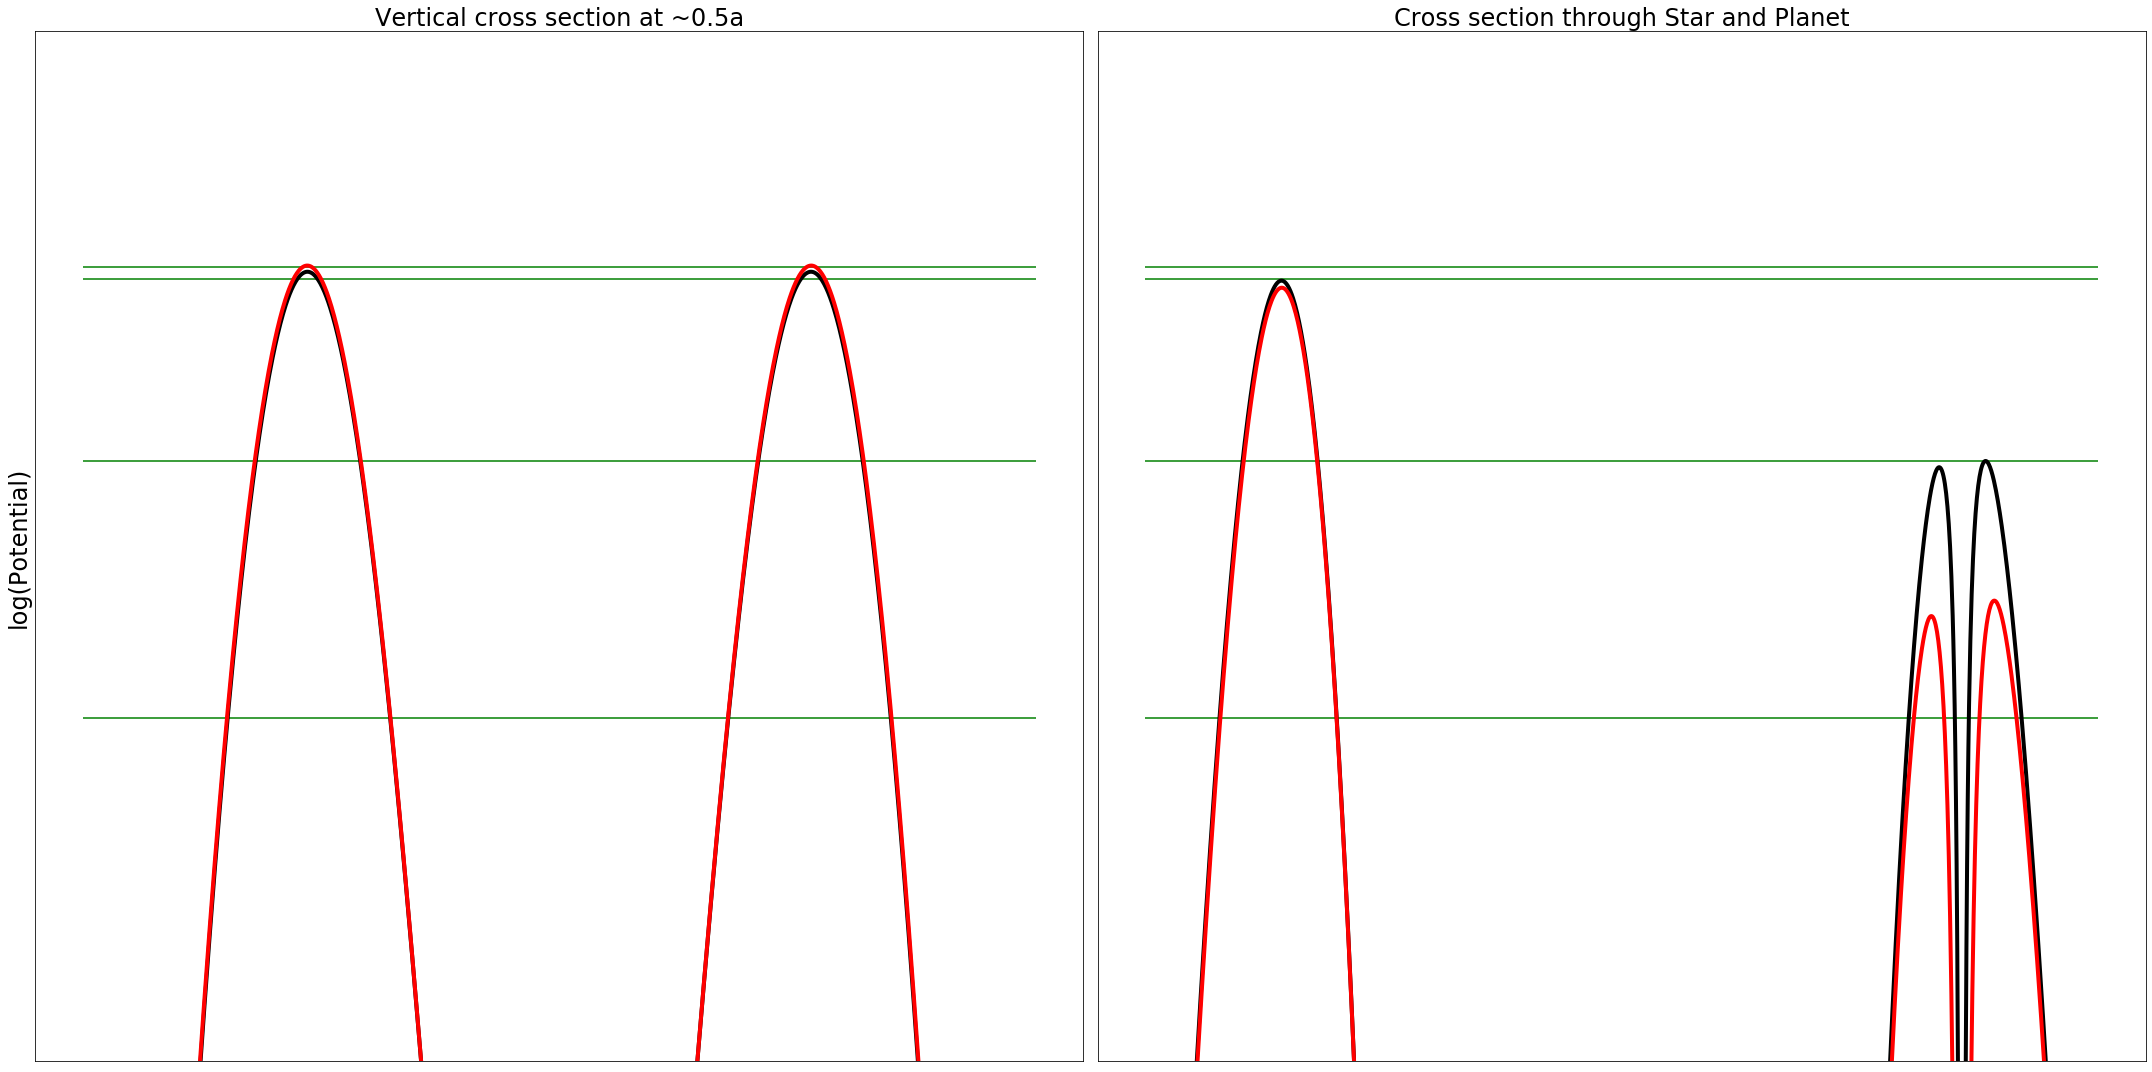

In [2]:
G = 4*np.pi**2

def roch2(x,y,M1,M2,a):
    q = M2/M1
    x /= a
    y /= a
    s1 = np.sqrt(x**2 + y**2)
    s2 = np.sqrt((x-1)**2 + y**2)
    
    term1 = 2/(s1*(1+q))
    term2 = 2*q/(s2*(1+q))
    term3 = (x - q/(1+q))**2
    term4 = y**2
    return term1 + term2 + term3 + term4

def dpot2(x,y,M1,M2,a):
    q = M2/M1
    x /= a
    y /= a
    s1 = x**2 + y**2
    s2 = (x-1)**2 + y**2
    
    term1 = (2/(1+q))*(-2*x/(s1**2) - 2*q*(x-1)/(s2**2))
    term2 = 2*x - 2*q/(1+q)
    return term1 + term2

def r_pol(r,psi,M1,M2,a):
    q = M2/M1
    x = r*np.cos(psi)
    y = r*np.sin(psi)
    x /= a
    y /= a
    s1 = np.sqrt(x**2 + y**2)
    s2 = np.sqrt((x-1)**2 + y**2)
    
    term1 = 2/(s1*(1+q))
    term2 = 2*q/(s2*(1+q))
    term3 = (x - q/(1+q))**2
    term4 = y**2
    return term1 + term2 + term3 + term4

delta = 0.01
x1 = np.arange(-7, 7, delta)
y1 = np.arange(-7, 7, delta)
X1, Y1 = np.meshgrid(x1, y1)

x2 = np.arange(-17.5,17.5,delta*2.5)
y2 = np.arange(-17.5,17.5,delta*2.5)
X2, Y2 = np.meshgrid(x2, y2)

Z1 = roch2(X1,Y1,1,9.543e-4, 5.2)
Z2 = roch2(X2,Y2,.4,9.543e-4, 13)

ax_len = 14/delta
mid = int(ax_len/2)
t34 = int(3*ax_len/4)

fig, ax = plt.subplots(1,2,figsize=(30,15))
ax[0].plot(Y1[:,t34],-np.log10(abs(Z1[:,t34])), "k", lw=4)
ax[0].plot(Y2[:,t34],-np.log10(abs(Z2[:,t34])), "r", lw=4)
ax[0].set_ylim((-.5,-.47))
ax[0].set_ylabel("log(Potential)", fontsize=24)
ax[0].set_title("Vertical cross section at ~0.5a", fontsize=24)
ax[1].plot(X1[mid,:],-np.log10(abs(Z1[mid,:])), "k", lw=4)
ax[1].plot(X2[mid,:],-np.log10(abs(Z2[mid,:])), "r", lw=4)
ax[1].set_ylim((-.5,-.47))
ax[1].set_title("Cross section through Star and Planet", fontsize=24)
for i in range(2):
    ax[i].hlines([-0.47685,-0.4772,-0.4825,-0.49],-1.4,1.4,"g")
    ax[i].set_yticks([])
    ax[i].set_xticks([])
fig.tight_layout()
fig.show()

NameError: name 'x_cross2' is not defined

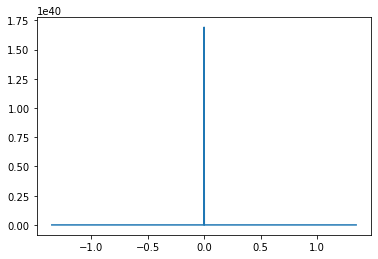

In [3]:
x_der1 = np.arange(-7,7,delta)
x_der2 = np.arange(-17.5,17.5,delta*2.5)

dZ1 = dpot2(x_der1, 0,1,9.543e-4, 5.2)/10
dZ2 = dpot2(x_der2, 0,.4,9.543e-4, 13)/10

plt.plot(x_der1, dZ1)
plt.plot(x_cross2, dz2_cross)
plt.ylim(-1,1)
plt.hlines(0,-1.5,1.5)
plt.show()

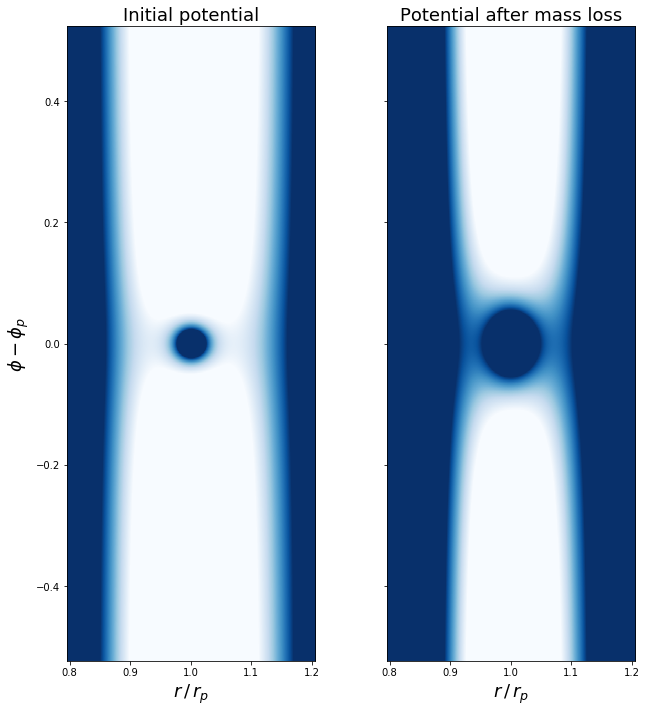

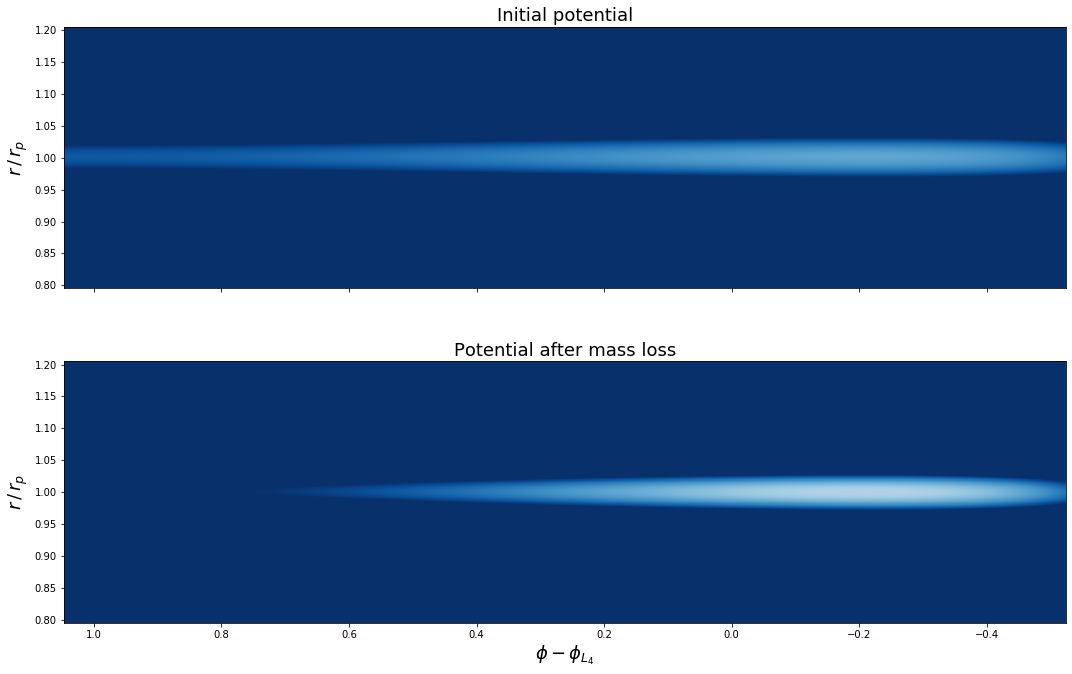

In [6]:
def r_hill(M1,M2,a):
    return a*((1/3)*(M2/M1))**(1/3)

a1 = 5.2
a2 = 13
M1i = 1
M1f = .4
M2 = 9.543e-4

# set angle from origin to target of second plot, and how much space you want on either side of it

target1 = 0
target2 = np.pi/3
hi_phi = 2*np.pi/3
lo_phi = np.pi/6

rlolim1 = a1 - 3*r_hill(M1i, M2, a1)
rhilim1 = a1 + 3*r_hill(M1i, M2, a1)
rlolim2 = a2 - 3*r_hill(M1f, M2, a2)
rhilim2 = a2 + 3*r_hill(M1f, M2, a2)

r1 = np.arange(rlolim1,rhilim1,delta/10)
r2 = np.arange(rlolim2,rhilim2,delta)
psi_t1 = np.arange(-np.pi/6,np.pi/6,delta/10)
psi_t2 = np.arange(target2 - lo_phi,target2 + hi_phi,delta/10)

R1, P1 = np.meshgrid(r1,psi_t1)
R2, P2 = np.meshgrid(r2,psi_t1)

Rt21, Pt21 = np.meshgrid(r1,psi_t2)
Rt22, Pt22 = np.meshgrid(r2,psi_t2)

Zt11 = r_pol(R1,P1,M1i,M2,a1)
Zt12 = r_pol(R2,P2,M1f,M2,a2)
Zt21 = r_pol(Rt21,Pt21,M1i,M2,a1)
Zt22 = r_pol(Rt22,Pt22,M1f,M2,a2)

fig, ax = plt.subplots(1,2, figsize=(10,10), sharey=True)

ax[0].imshow(np.log10(abs(Zt11)), cmap="Blues", vmin=0.482, vmax=.488, aspect='auto',extent=[rlolim1/a1,rhilim1/a1,target1-np.pi/6,target1+np.pi/6])
ax[1].imshow(np.log10(abs(Zt12)), cmap="Blues", vmin=0.482, vmax=.488, aspect='auto',extent=[rlolim1/a1,rhilim1/a1,target1-np.pi/6,target1+np.pi/6])
ax[0].set_ylabel(r"$\phi-\phi_p$", fontsize=18)
for n in range(2):
    ax[n].set_xlabel(r"$r\,/\,r_p$", fontsize=18)
    ax[n].set_aspect("equal")
ax[0].set_title("Initial potential", fontsize=18)
ax[1].set_title("Potential after mass loss", fontsize=18)

fig.tight_layout()
fig.show()

figure, axes = plt.subplots(2, figsize=(15,10), sharex=True)

axes[0].imshow(np.flip(np.log10(abs(Zt21)).T,1), cmap="Blues", vmin=0.4765, vmax=0.4774, aspect='auto',extent=[2*np.pi/3-target2,np.pi/6-target2,rlolim1/a1,rhilim1/a1])
axes[1].imshow(np.flip(np.log10(abs(Zt22)).T,1), cmap="Blues", vmin=0.4765, vmax=0.4774, aspect='auto',extent=[2*np.pi/3-target2,np.pi/6-target2,rlolim1/a1,rhilim1/a1])
axes[1].set_xlabel(r"$\phi-\phi_{L_4}$", fontsize=18)
for n in range(2):
    axes[n].set_ylabel(r"$r\,/\,r_p$", fontsize=18)
    axes[n].set_aspect("equal")
axes[0].set_title("Initial potential", fontsize=18)
axes[1].set_title("Potential after mass loss", fontsize=18)

figure.tight_layout()
figure.show()

fig.savefig("roche_polar_hill.png", dpi=300)
figure.savefig("roche_polar_L4.png", dpi=300)

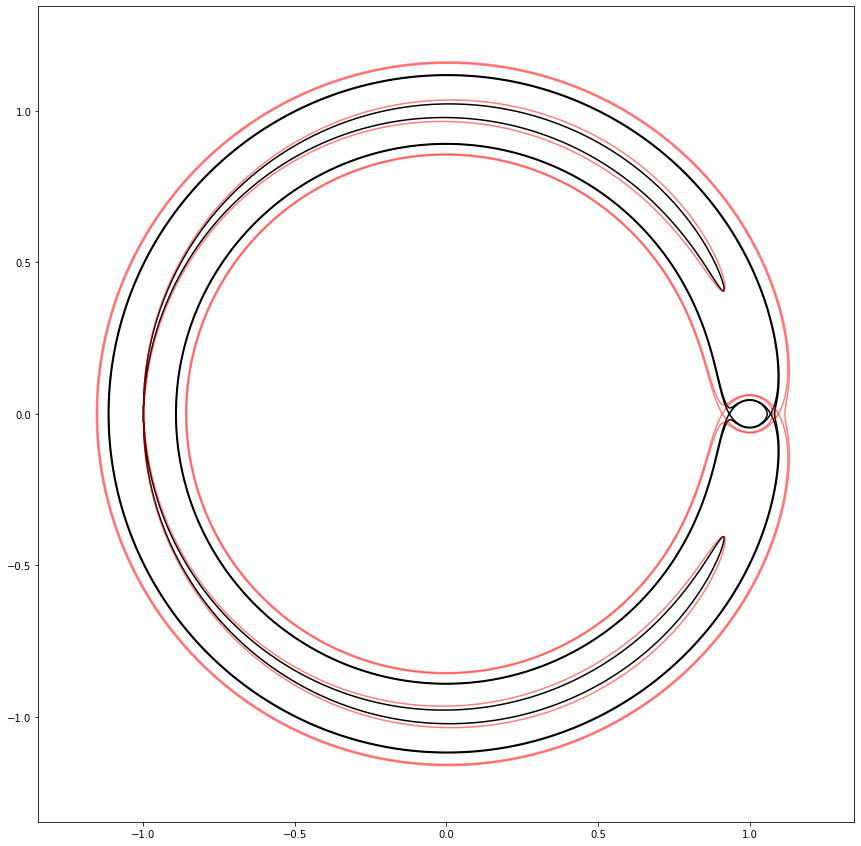

In [7]:
lines1 = np.array([3.0009555,3.03748,3.038754])
lines2 = np.array([3.002381,3.0660664,3.069239])
u1, u2, u3 = lines1
U1, U2, U3 = lines2

fig, ax = plt.subplots(1,figsize=(15,15))
ax.contour(X1,Y1,Z1,lines1, colors='k')
ax.contour(X2,Y2,Z2,lines2, colors='r', alpha=.5)
ax.set_aspect("equal")
fig.show()
fig.savefig("separatrix_1.png", dpi=300)

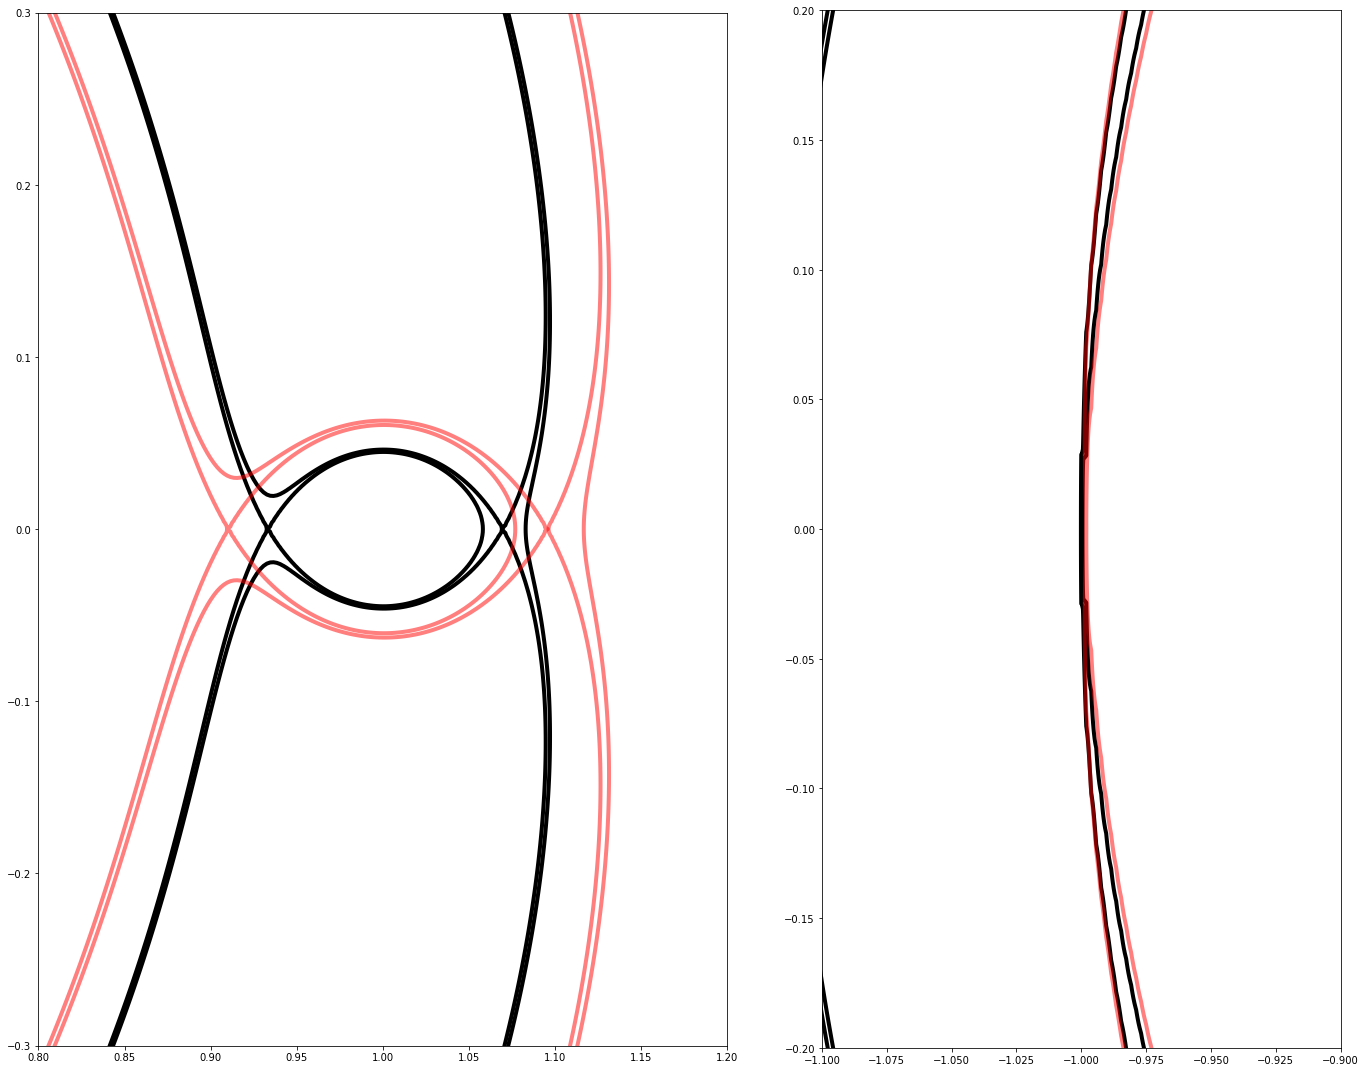

In [8]:
fig, ax = plt.subplots(1,2,figsize=(20,15))
ax[0].contour(X1,Y1,Z1,lines1, colors='k', linewidths=4)
ax[0].contour(X2,Y2,Z2,lines2, colors='r', linewidths=4, alpha=.5)
ax[0].set_xlim((.8,1.2))
ax[0].set_ylim((-.3,.3))
ax[1].contour(X1,Y1,Z1,lines1, colors='k', linewidths=4)
ax[1].contour(X2,Y2,Z2,lines2, colors='r', linewidths=4, alpha=.5)
ax[1].set_xlim((-1.1,-.9))
ax[1].set_ylim((-.2,.2))
for i in range(2):
    ax[i].set_aspect("equal")
fig.tight_layout()
fig.show()
fig.savefig("separatrix_zoomed.png", dpi=300)

In [15]:
delta = 0.01
x1 = np.arange(-7, 7, delta)
y1 = np.arange(-7, 7, delta)
X1, Y1 = np.meshgrid(x1, y1)

Z3 = roch2(X1,Y1,.8,.8, 5.2)

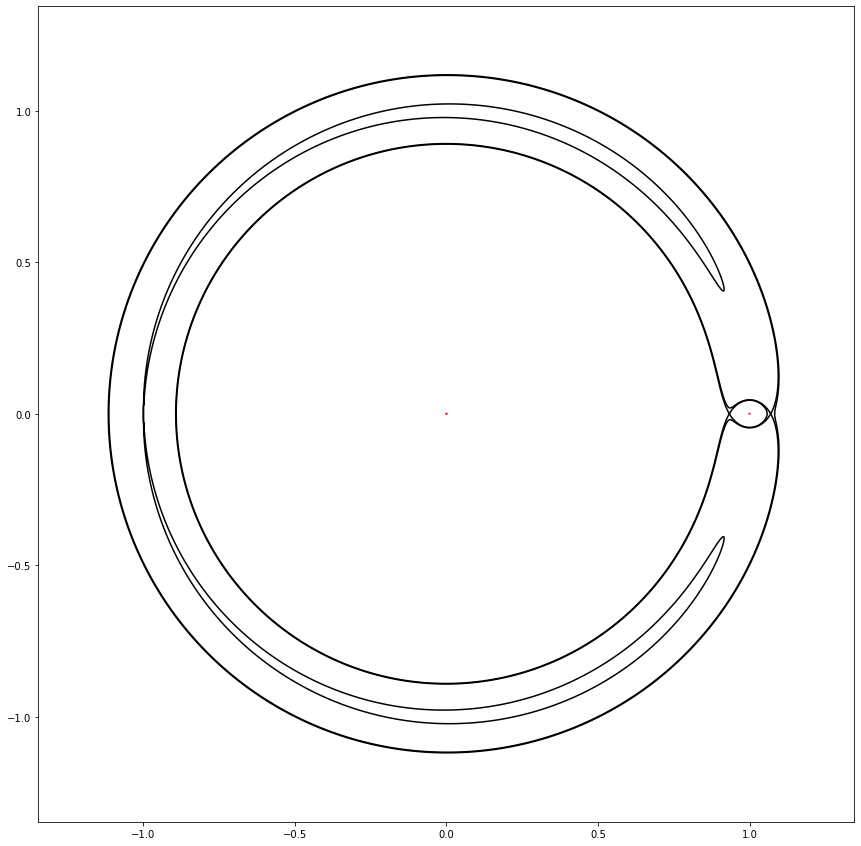

In [16]:
fig, ax = plt.subplots(1,figsize=(15,15))

ax.contour(X1,Y1,Z1,lines1, colors='k')
ax.contour(X1,Y1,Z3, colors='r', alpha=.5)
ax.set_aspect("equal")
fig.show()
fig.savefig("separatrix_mess_up.png", dpi=300)